# Simple Linear Regression
- one independent variable

X = independent, predictors, feature variables<br>
y = dependent, target, output variable

In [13]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## prepare the dataset

In [19]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [25]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Visualization

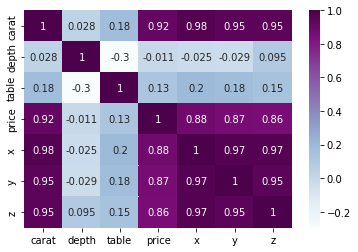

In [32]:
sns.heatmap(diamonds.corr(), annot = True, cmap = 'BuPu')
plt.show()

**From the above heatmap we find that carat and price column have good correlation between them and hence we can do simple linear regression using these two columns**

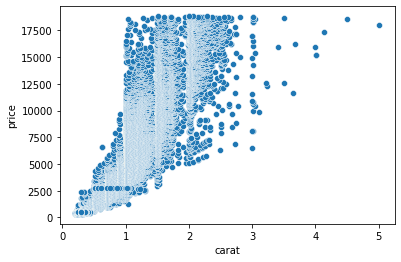

In [39]:
sns.scatterplot(x = diamonds.carat, y = diamonds.price)
plt.show()

In [87]:
X = np.array(diamonds['carat'].values).reshape(-1,1) #converting into 2-d format using reshape
y = diamonds['price'].values

In [88]:
len(X)

53940

## Train-Test-Split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [91]:
X_train.shape

(37758, 1)

In [92]:
y_train.shape

(37758,)

In [93]:
X_test.shape

(16182, 1)

In [94]:
y_test.shape

(16182,)

In [95]:
X_train

array([[1.21],
       [0.31],
       [1.21],
       ...,
       [0.33],
       [0.9 ],
       [1.14]])

## Model Building

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
slr_model = LinearRegression()   # creating LinearRegression object for training

slr_model.fit(X_train,y_train)               # fit trains the model using X & y value but input should be 2-dimensional

LinearRegression()

## Evaluation

**r2 score**

In [98]:
slr_model.score(X_test,y_test)

0.8486858713767871

**r2 score value is 0.85. Which means our model is able to explain 85% variance in the data**

**intercept**

In [99]:
i = slr_model.intercept_ 
i

-2258.91865599418

**slope**

In [100]:
m = slr_model.coef_
m

array([7765.31828393])

Now we have intercept and slope value; we can make equation of the best fit line:
    
    y = m*x + c i.e.,
    y = 7765.318 * x + (-2258.918)

In [101]:
def prediction(x):
    y = (7765.318 * x) - 2258.918
    return y

## Prediction

In [102]:
X_test[:5]

array([[0.24],
       [0.58],
       [0.4 ],
       [0.43],
       [1.55]])

In [103]:
y_test[:5]

array([ 559, 2201, 1238, 1304, 6901], dtype=int64)

In [104]:
# prediction using the above prediction function

prediction(0.24)

-395.2416800000001

In [105]:
y_pred = slr_model.predict(X_test)

## Visualization

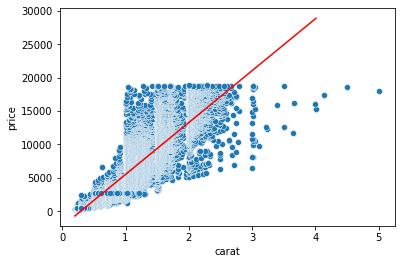

In [115]:
sns.scatterplot(x=diamonds.carat,y=diamonds.price)
sns.lineplot(x = X_test.reshape(-1), y= y_pred, color = 'red')
plt.show()

**What will be the price of a 2 carat diamond ?**

In [118]:
# using predict function from the model to predict the values

slr_model.predict([[2]])

array([13271.71791186])

**13271 dollar will be the price of a 2 carat diamond**

In [ ]:
RRAJ

# Example - 2
- Car age and Car speed prediction

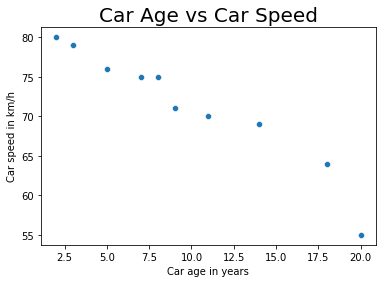

In [123]:
car_age = [2,5,3,7,8,9,20,14,18,11]
car_speed = [80,76,79,75,75,71,55,69,64,70]


sns.scatterplot(x = car_age, y = car_speed)
plt.title("Car Age vs Car Speed", size = 20)
plt.xlabel('Car age in years')
plt.ylabel('Car speed in km/h')
plt.show()

# Train a model with the given values

In [128]:
X = np.array(car_age).reshape(-1,1)

In [130]:
%%time

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, car_speed)

Wall time: 997 µs


LinearRegression()

# prediction

In [134]:
model.predict([[2]])

array([80.60012045])

In [136]:
y_pred = model.predict(X)

In [138]:
df = pd.DataFrame({'X':car_age,
              'actual speed':car_speed,
              'predicted speed':y_pred})
df

,X,actual speed,predicted speed
0,2,80,80.600120
1,5,76,77.015658
2,3,79,79.405300
3,7,75,74.626016
4,8,75,73.431195
5,9,71,72.236375
6,20,55,59.093345
7,14,69,66.262270
8,18,64,61.482987
9,11,70,69.846733


# Visualization

<AxesSubplot:xlabel='X', ylabel='actual speed'>

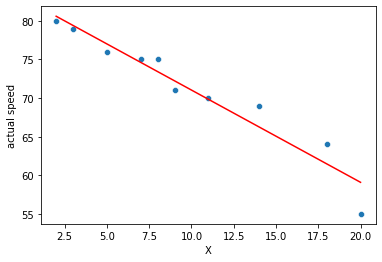

In [148]:
sns.scatterplot(df.X,df['actual speed'])
sns.lineplot(df.X,df['predicted speed'], color = 'red')

# Evaluation

In [149]:
model.score(X, car_speed)

0.9288889266461456

R2 value os 92.88 percent

In [156]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [157]:
r2_score(car_speed,y_pred)

0.9288889266461456

# R2 score value is 0.9288 which is a very good value obtained by the model.
It means our model is able to explain 92.8% variance in the data.

In [158]:
# mean absolute error

mean_absolute_error(car_speed,y_pred)

1.4701595904847935

In [155]:
# mean square error

mean_squared_error(car_speed,y_pred)

3.6295091839807263

In [159]:
# root mean squared error

np.sqrt(mean_squared_error(car_speed,y_pred))

1.9051270781710932

# Understanding the impact of outliers in errors

#### exactly same predictions

In [160]:
y_actual = [2,3,4,5,6,5,6,7]
y_pred = [2,3,4,5,6,5,6,7]

In [161]:
mean_absolute_error(y_actual, y_pred)

0.0

In [162]:
mean_squared_error(y_actual, y_pred)

0.0

In [163]:
np.sqrt(mean_squared_error(y_actual, y_pred))

0.0

### with some outliers in data

In [164]:
y_actual = [2,3,4,5,6,500,6,7]
y_pred = [2,3,4,5,6,5,6,7]

In [165]:
mean_absolute_error(y_actual, y_pred)

61.875

In [166]:
mean_squared_error(y_actual, y_pred)

30628.125

In [167]:
np.sqrt(mean_squared_error(y_actual, y_pred))

175.0089283436705